In [1]:
#데이터 핸들링 라이브러리
import numpy as np
import pandas as pd

#통계 라이브러리
from scipy import stats

#머신러닝 라이브러리
from sklearn.base import BaseEstimator
#정확도 측정 함수
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#정확도 측정 함수를 모듈로 만듬
from evaluate_clf import get_clf_eval,get_clf_eval2,get_eval_by_threshold
from evaluate_clf import roc_curve_plot,precision_recall_curve_plot

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#BaseEstimator: Base class for all estimators in scikit-learn.
class MyDummyClassifier(BaseEstimator):
    #fit 메소드는 아무것도 학습시키지 않는다
    def fit(self,x,y=None):
        pass
    # predict() 메소드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측한다
    def predict(self,X):
        pred= np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred


In [3]:
from titanic_preprocessing import preprocessing_feature

In [4]:
#BaseEstimator: Base class for all estimators in scikit-learn.
class MyDummyClassifier(BaseEstimator):
    #fit 메소드는 아무것도 학습시키지 않는다
    def fit(self,x,y=None):
        pass
    # predict() 메소드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측한다
    def predict(self,X):
        pred= np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

#챕터 2에서 만들어둔 모듈을 가져옴
from titanic_preprocessing import preprocessing_feature
#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터를 분할한다
titanic_df =pd.read_csv('./train.csv')
y_titanic_df= titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df= preprocessing_feature(X_titanic_df)

X_train, X_test, y_train, y_test= train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

#위의 Dummy_Classifier 모델을 이용하여 학습/예측 평가해보자
myclf= MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions= myclf.predict(X_test)
print(f'Dummy Classifier의 정확도는 {accuracy_score(y_test,mypredictions):.3f}')

Dummy Classifier의 정확도는 0.788


In [5]:
#위의 Dummy_Classifier 모델을 이용하여 학습/예측 평가해보자
myclf= MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions= myclf.predict(X_test)
print(f'Dummy Classifier의 정확도는 {accuracy_score(y_test,mypredictions):.3f}')

Dummy Classifier의 정확도는 0.788


In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    #아무것도 학습시키지 않는다
    def fit(self,X,y):
        pass
    #입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0으로 만들어서 반환
    #그냥 모든 것을 0으로 예측한다는 의미
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

#사이킷런의 내장 데이터 셋인 load_digits()을 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7번이면 True이고, 이를 astype(int)는 부울값 T or F를 1 or 0으로 변환시켜준다
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test= train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print(f'레이블 테스트 세트 크기:{y_test.shape}')
print('테스트 셋 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습/예측/정확도 평가
fakeclf= MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred= fakeclf.predict(X_test)
print(f'모든 예측을 0으로 하여도 정확도는 {accuracy_score(y_test,fakepred):.3f}')


레이블 테스트 세트 크기:(450,)
테스트 셋 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 0.900


## 오차 행렬

In [7]:
from sklearn.metrics import confusion_matrix

confusion_mtr = confusion_matrix(y_test,fakepred)
confusion_mtr

array([[405,   0],
       [ 45,   0]])

In [8]:
#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터를 분할하기
titanic_df= pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)
X_titanic_df= preprocessing_feature(X_titanic_df)

X_train,X_test, y_train,y_test= train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred= lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[108  10]
 [ 16  45]]
정확도 0.855 정밀도 0.818 재현율 0.738 


## 정밀도/ 재현율의 tradeoff

In [9]:
pred_proba= lr_clf.predict_proba(X_test)
pred= lr_clf.predict(X_test)
print(f'print_proba 결과 shape:{pred_proba.shape}')
print(f'pred_proba array에서 앞 3개만 샘플로 추출 \n: {pred_proba[:3]}')


#예측 확률 arr와 예측 결과값 arr를 병합concatenate하여 예측 확률과 결과값을 한눈에 확인한다
pred_proba_result= np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print(f'두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측한다.\n{pred_proba_result[:3]}')

print_proba 결과 shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.45476527 0.54523473]
 [0.86547383 0.13452617]
 [0.8654983  0.1345017 ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측한다.
[[0.45476527 0.54523473 1.        ]
 [0.86547383 0.13452617 0.        ]
 [0.8654983  0.1345017  0.        ]]


In [10]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]
#X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1을 반환시킨다
binarizer= Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [11]:


#Binzarizer의 threshold 설정값. 분류 결정 임계값임
custom_threshold= 0.5
#predit_proba()의 반환값의 두번째 컬럼, 즉 positive 클래스 컬럼중 하나만 추출하여 Binarizer를 적용시킨다
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차 행렬
[[108  10]
 [ 16  45]]
정확도 0.855 정밀도 0.818 재현율 0.738 


In [12]:
#Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임계값을 0.5에서 0.4로 낮춘다
custom_threshold= 0.4
pred_proba_1= pred_proba[:,1].reshape(-1,1)
binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차 행렬
[[98 20]
 [11 50]]
정확도 0.827 정밀도 0.714 재현율 0.820 


In [13]:
from sklearn.metrics import f1_score
f1= f1_score(y_test,pred)
print(f'f1 스코어는 {f1:.3f}')

f1 스코어는 0.776


In [14]:

thresholds= [0.4,0.45,0.50,0.55,0.60]
#pred_proba= lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

------------------------------------------------------
임계값 0.4
오차 행렬
[[98 20]
 [11 50]]
정확도 0.827 정밀도 0.714 재현율 0.820 
------------------------------------------------------
임계값 0.45
오차 행렬
[[106  12]
 [ 14  47]]
정확도 0.855 정밀도 0.797 재현율 0.770 
------------------------------------------------------
임계값 0.5
오차 행렬
[[108  10]
 [ 16  45]]
정확도 0.855 정밀도 0.818 재현율 0.738 
------------------------------------------------------
임계값 0.55
오차 행렬
[[111   7]
 [ 17  44]]
정확도 0.866 정밀도 0.863 재현율 0.721 
------------------------------------------------------
임계값 0.6
오차 행렬
[[113   5]
 [ 18  43]]
정확도 0.872 정밀도 0.896 재현율 0.705 


## ROC 곡선과 AUC
- Reciever Operation Characteristic Curve -수신자 판단 곡선 
- ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다


In [15]:
from sklearn.metrics import roc_curve
#레이블 값이 1일때의 예측확률을 추출하기
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs,tprs,thresholds =roc_curve(y_test,pred_proba_1)

#반환된 임계값 배열에서 샘플로 데이터를 추출하되 임계값을 5 step으로 추출한다
#thresholds[0]는 max(예측확률)+1로 임의 설정한다
thr_index= np.arange(1,thresholds.shape[0],5)
print(f'샘플 추출을 위한 임계값 배열의 index {thr_index}')
print(f'샘플 index로 추출한 임계값,{np.round(thresholds[thr_index],2)}')

#5 스텝 단위로 추출된 임계값에 따른 FPR, TPR 값
print(f'샘플 임계값 FPR {np.round(fprs[thr_index],3)}')
print(f'샘플 임계값 FPR {np.round(tprs[thr_index],3)}')

샘플 추출을 위한 임계값 배열의 index [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값,[0.94 0.7  0.62 0.57 0.44 0.36 0.32 0.15 0.13 0.13 0.12]
샘플 임계값 FPR [0.    0.008 0.025 0.059 0.11  0.195 0.22  0.534 0.61  0.746 0.831]
샘플 임계값 FPR [0.016 0.508 0.689 0.721 0.787 0.82  0.885 0.902 0.951 0.967 1.   ]


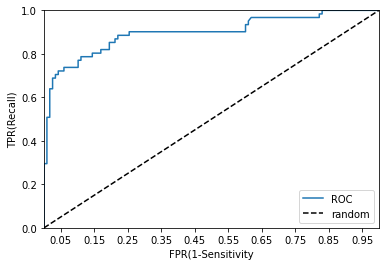

In [16]:
roc_curve_plot(y_test,pred_proba[:,1])

In [17]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print(f'ROC AUC의 값 {roc_score:.3f}')


ROC AUC의 값 0.898


##  피마 인디언 당뇨병 예측하기

In [18]:
# 데이터 핸들링 라이브러리
import numpy as np
import pandas as pd 

#데이터 시각화 라이브러리
import matplotlib.pyplot as plt 
%matplotlib inline

#머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_df= pd.read_csv('diabetes.csv')
diabetes_df.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [19]:
#데이터프레임의 데이터속성 확인하기
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
#데이터프레임의 결측값 확인하기 => 결측값이 존재하지 않는다
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 데이터 전처리하기
- 결측값 확인 및 처리
- 문자열 카테고리 -> 정수형 카테고리로 인코딩
- 정규화 
- 훈련 및 테스트 데이터로 분리하기

In [21]:
# 피처 데이터 셋 X, 레이블 데이터 셋 y로 분리하기
# 맨 끝이 outcome 컬럼으로 레이블 값. 컬럼위치 -1을 이용하여 추출한다
X= diabetes_df.iloc[:,:-1]
y= diabetes_df.iloc[:,-1]

#학습 및 테스트 데이터로 분리시키기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가를 수행하기
lr_clf= LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval2(y_test,pred,pred_proba)

오차 행렬
[[87 13]
 [22 32]]
 정확도는 0.773 정밀도는 0.711     재현율은 0.593 F1는 0.646, AUC는 0.808 이다


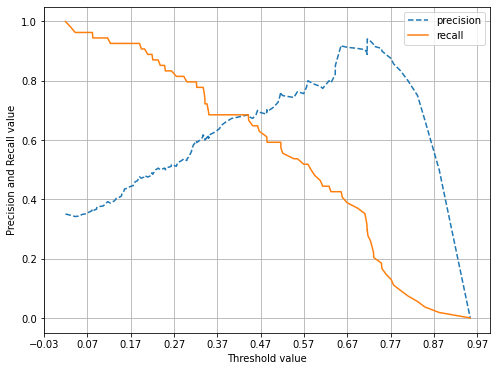

In [22]:
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])


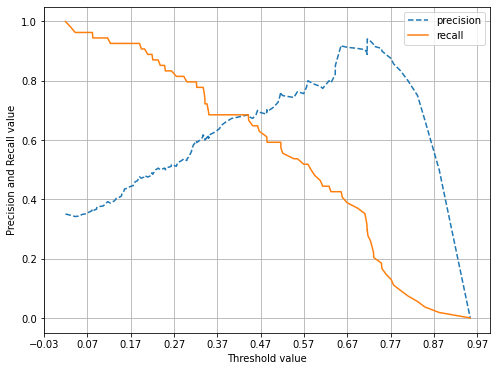

In [23]:
pred_proba_c1= lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

#recall과 precision 모두 0.7이 안되는 낮은 수치를 가지고 있다. 이러한 문제점을 해결하기 위해
#다시 데이터값을 점검해본다


- 현재 이 기술통계량을 보면 최소값 min이 0이 되는 피처들이 많다는 것을 알 수 있다
- 현실세계에 비추어 보았을때 이러한 값을 가지는 것은 지극히 낮은 확률일 것이므로 데이터가 잘못 되었을 가능성이 존재한다

In [24]:
df_stats=diabetes_df.describe().T
df_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


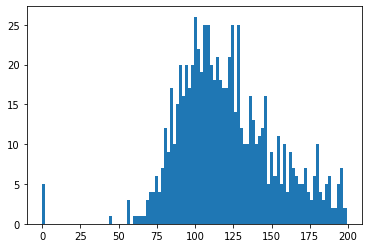

In [25]:
plt.hist(diabetes_df['Glucose'],bins=100)
plt.show()

In [26]:
#0값을 검사할 피처명 리스트
col_names= diabetes_df.columns
pd.DataFrame(col_names)

zero_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count = diabetes_df['Glucose'].count()

#피처별로 반복하면서 데이터값이 0 인 데이터건수를 추출하고 퍼센트를 계산한다
for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print(f'{feature}의 0값의 데이터포인트 갯수는 {zero_count}, 퍼센트는 {100*zero_count/total_count:.2f}%입니다')



Glucose의 0값의 데이터포인트 갯수는 5, 퍼센트는 0.65%입니다
BloodPressure의 0값의 데이터포인트 갯수는 35, 퍼센트는 4.56%입니다
SkinThickness의 0값의 데이터포인트 갯수는 227, 퍼센트는 29.56%입니다
Insulin의 0값의 데이터포인트 갯수는 374, 퍼센트는 48.70%입니다
BMI의 0값의 데이터포인트 갯수는 11, 퍼센트는 1.43%입니다


- SkinThickness의 0값 데이터포인트 퍼센트는 29.56%, Insulin는 48.70%로 상당히 높은 비율이 나왔다
- 그러나 전체 데이터수가 많지 않기 때문에 이 데이터들을 일괄적을 삭제할 경우 학습에 차질이 발생할 수 있으므로
- 위 피처들의 0값을 평균값으로 대체하도록 한다

In [27]:
X= diabetes_df.iloc[:,:-1]
y= diabetes_df.iloc[:,-1]

#Standardscaler 클래스를 활용하여 피처 데이터 셋에 일괄적으로 스케일링을 적용한다
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=156,stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가를 수행한다
lr_clf= LogisticRegression()
lr_clf.fit(X_train,y_train)
pred= lr_clf.predict(X_test)
pred_proba= lr_clf.predict_proba(X_test)[:,1]

get_clf_eval2(y_test,pred,pred_proba)

오차 행렬
[[90 10]
 [21 33]]
 정확도는 0.799 정밀도는 0.767     재현율은 0.611 F1는 0.680, AUC는 0.806 이다


In [28]:
thresholds=[0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba= lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)


------------------------------------------------------
임계값 0.3
오차 행렬
[[69 31]
 [13 41]]
정확도 0.714 정밀도 0.569 재현율 0.759 
------------------------------------------------------
임계값 0.33
오차 행렬
[[74 26]
 [17 37]]
정확도 0.721 정밀도 0.587 재현율 0.685 
------------------------------------------------------
임계값 0.36
오차 행렬
[[76 24]
 [18 36]]
정확도 0.727 정밀도 0.600 재현율 0.667 
------------------------------------------------------
임계값 0.39
오차 행렬
[[79 21]
 [19 35]]
정확도 0.740 정밀도 0.625 재현율 0.648 
------------------------------------------------------
임계값 0.42
오차 행렬
[[81 19]
 [20 34]]
정확도 0.747 정밀도 0.642 재현율 0.630 
------------------------------------------------------
임계값 0.45
오차 행렬
[[85 15]
 [20 34]]
정확도 0.773 정밀도 0.694 재현율 0.630 
------------------------------------------------------
임계값 0.48
오차 행렬
[[88 12]
 [21 33]]
정확도 0.786 정밀도 0.733 재현율 0.611 
------------------------------------------------------
임계값 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도 0.799 정밀도 0.767 재현율 0.611 


In [29]:
#임계값을 0.48로 설정한 Binarizer를 생성하자
binarizer = Binarizer(threshold=0.48)
pred_th_048= binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval2(y_test,pred_th_048,pred_proba[:,1])

오차 행렬
[[88 12]
 [21 33]]
 정확도는 0.786 정밀도는 0.733     재현율은 0.611 F1는 0.667, AUC는 0.806 이다


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59f71f48-e620-40de-82b6-60c121211e54' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>